In [1]:
import nltk

In [3]:
# nltk.download()

### Regular expression

In [4]:
### Add remaning stuff later

## 2. Text processing

In [5]:
import nltk
print("book ids =",nltk.corpus.gutenberg.fileids())

book ids = ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [6]:
# load alice the wonderland

alice = nltk.corpus.gutenberg.words("carroll-alice.txt")
print(len(alice))

34110


In [7]:
alice[:10] # list of words

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll']

In [8]:
# word tokenizer
print(nltk.word_tokenize("the patient has been diagnosed with cancer on 13/12/2020"))

['the', 'patient', 'has', 'been', 'diagnosed', 'with', 'cancer', 'on', '13/12/2020']


In [9]:
text = "the mane runnig with the ball. defender wants to tackle could he? Yes, he can & he will. doc. have to come"
print(nltk.sent_tokenize(text))

['the mane runnig with the ball.', 'defender wants to tackle could he?', 'Yes, he can & he will.', 'doc.', 'have to come']


In [10]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
punkt_param = PunktParameters()
punkt_param.abbrev_types = set(['doc'])
sentence_splitter = PunktSentenceTokenizer(punkt_param)
sentences = sentence_splitter.tokenize(text)
print(sentences)

['the mane runnig with the ball.', 'defender wants to tackle could he?', 'Yes, he can & he will.', 'doc. have to come']


## Stop word removal

In [11]:
from nltk.corpus import stopwords
stops = stopwords.words("English")

In [14]:
stops[:5]

['i', 'me', 'my', 'myself', 'we']

In [15]:
def remove_stopwords(stopwords,sen):
    clean_text = ' '.join([word for word in sen.split() if word not in stopwords])
    return clean_text

In [16]:
remove_stopwords(stops,text)

'mane runnig ball. defender wants tackle could he? Yes, & will. doc. come'

## Text Normalization

In [19]:
# port stemmer

def port_stemmer(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

In [20]:
port_stemmer(text.split())

['the',
 'mane',
 'runnig',
 'with',
 'the',
 'ball.',
 'defend',
 'want',
 'to',
 'tackl',
 'could',
 'he?',
 'yes,',
 'he',
 'can',
 '&',
 'he',
 'will.',
 'doc.',
 'have',
 'to',
 'come']

## Text exploration

In [21]:
# Frequency analysis
from nltk.probability import FreqDist
from nltk.corpus import gutenberg

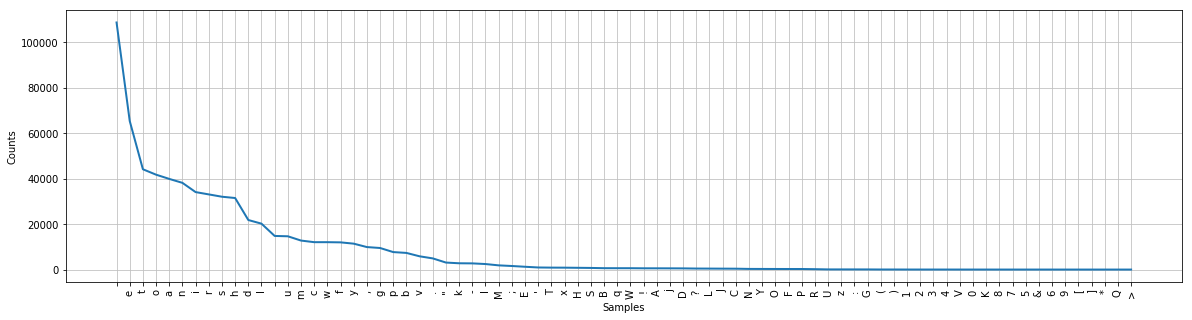

In [26]:
# get raw text

# 1) letter plot
raw = gutenberg.raw("austen-sense.txt")
freq_dist = FreqDist(raw)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
freq_dist.plot(100)

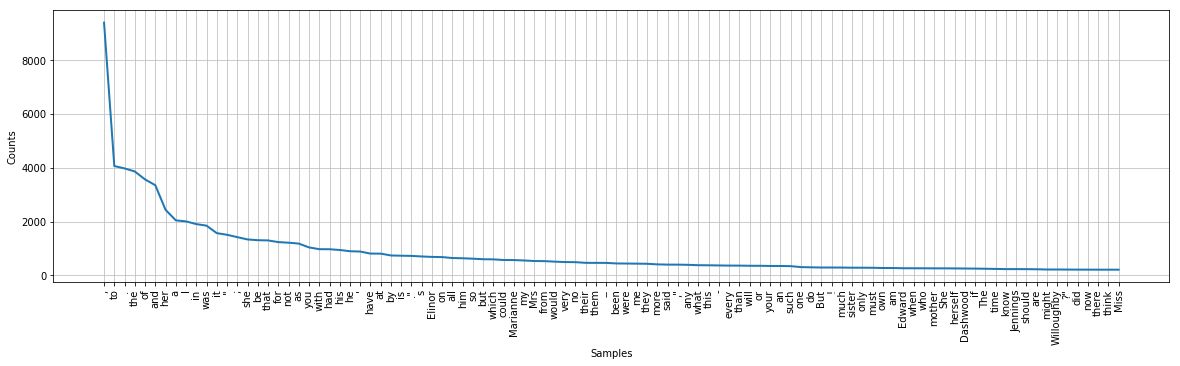

In [28]:
words = gutenberg.words("austen-sense.txt")
freq_word = FreqDist(words)
plt.figure(figsize=(20,5))
freq_word.plot(100)

### collocation
Collocations are two or more words that tend to appear frequently together

In [44]:
nltk.Text(words).collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


In [45]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [57]:
finder = BigramCollocationFinder.from_words(words)

In [61]:
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 20)
# we can also check my removeing stop words and punctuation to check common big-grams

[('&', 'c'),
 ('Good', 'heavens'),
 ('private', 'balls'),
 ('Good', 'gracious'),
 ('Combe', 'Magna'),
 ('burst', 'forth'),
 ('Another', 'pause'),
 ('Lord', 'bless'),
 ('near', 'Plymouth'),
 ('proper', 'submission'),
 ('eight', 'o'),
 ('smart', 'beaux'),
 ('Harley', 'Street'),
 ('faint', 'smile'),
 ('Berkeley', 'Street'),
 ('picturesque', 'beauty'),
 ('bad', 'news'),
 ('Conduit', 'Street'),
 ('Bond', 'Street'),
 ('earnestly', 'pressed')]

**Concordance view**

also called as key word in context shows specified word with the word surrounded in the text. this can help us to understand how the word is used in the text

In [68]:
# concordance is function works with text object of nltk
nltk.Text(words).concordance("affectionately")

Displaying 2 of 2 matches:
before . She took them all most affectionately by the hand , and expressed gre
ed , took her hand , kissed her affectionately several times , and then gave w


**similar words**

In [69]:
sas = nltk.Text(words)

In [70]:
sas.similar("affection")

attention time regard mother love heart opinion sister wishes wife
arrival marianne kindness family it marriage sisters sake conduct mind


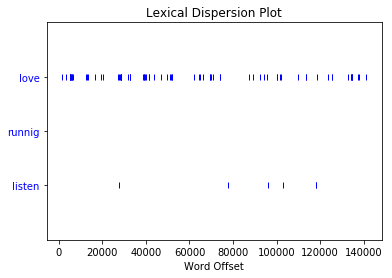

In [73]:
sas.dispersion_plot(["love","runnig","listen"])
# running is nerver used in the corpus where as love is used in all parts of the text

## Buidling features

**1. Bag of words**

vocab = today, here, i , a, fine, sun

I saw a bird today

BOW encoded as one hot vector

1 0 1 0 1


**2. N- grams**

unigram , bi-gram & tri-gram

**3. Morphological Parsing**

convert input data into morphological parts, relaed to stemming
ex: geeses = goose + N + PL

**4 TF-IDF**

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['This is the first document.','This document is the second document.']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [82]:
import pandas as pd
pd.DataFrame(X.todense(),columns=vectorizer.get_feature_names())

,document,first,is,second,the,this
0,0.409090,0.574962,0.409090,0.000000,0.409090,0.409090
1,0.667582,0.000000,0.333791,0.469132,0.333791,0.333791


In [78]:
vectorizer.get_feature_names()

['document', 'first', 'is', 'second', 'the', 'this']

In [83]:
# certain variation of this is availabel such as sublinear_tf
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}